In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [121]:
fraud=pd.read_csv("Fraud_check.csv")

In [122]:
fraud.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


<AxesSubplot:>

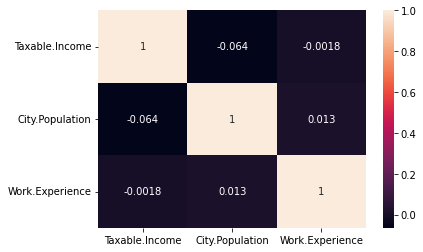

In [123]:
sns.heatmap(fraud.corr(), annot=True)

In [124]:
fraud["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [125]:
fraud["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [126]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [127]:
risk=lambda x: "Risky" if x<= 30000 else "Good"

In [128]:
fraud["Category"]=fraud['Taxable.Income'].apply(risk)

In [129]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [130]:
fraud["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [131]:
# changed yes as 1 and NO as 0
fraud["Undergrad"].replace({"YES":1,"NO":0}, inplace=True)

In [132]:
# changed yes as 1 and NO as 0
fraud["Urban"].replace({"YES":1,"NO":0}, inplace=True)

In [133]:
fraud["Category"].replace({"Risky":0,"Good":1}, inplace=True)

In [134]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,0,Single,68833,50047,10,1,1
1,1,Divorced,33700,134075,18,1,1


In [135]:
fraud_new=pd.get_dummies(fraud, columns=["Marital.Status"])

In [136]:
fraud_new

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Category,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0
3,1,50190,193264,15,1,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,1,1,0,0
596,1,69967,55369,2,1,1,1,0,0
597,0,47334,154058,0,1,1,1,0,0
598,1,98592,180083,17,0,1,0,1,0


<AxesSubplot:>

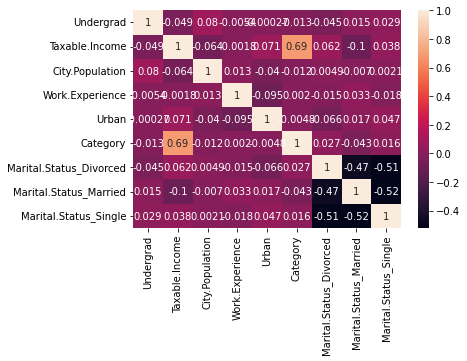

In [137]:
sns.heatmap(fraud_new.corr(), annot=True)

<AxesSubplot:>

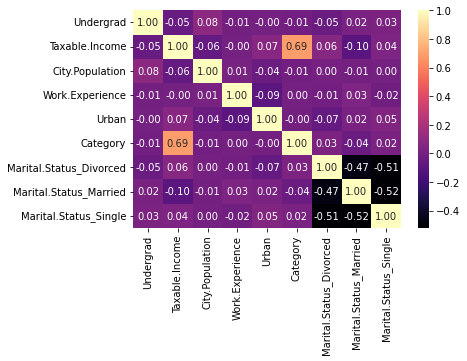

In [138]:
sns.heatmap(fraud_new.corr(), cmap='magma', annot=True, fmt=".2f")

In [139]:
fraud_new["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [140]:
fraud_new.head(3)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Category,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0


In [141]:
x=fraud_new.drop("Category", axis=1)
y=fraud_new["Category"]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.22, random_state= 42)

In [143]:
for i in range(1,20):
    model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    model_CART.fit(x_train,y_train)
    print(model_CART.score(x_test,y_test))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [147]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
model_CART.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

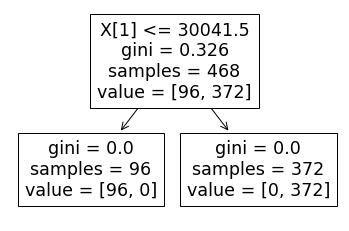

In [148]:
tree.plot_tree(model_CART);

In [149]:
for i in range(1,20):
    model_CART = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    model_CART.fit(x_train,y_train)
    print(model_CART.score(x_test,y_test))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


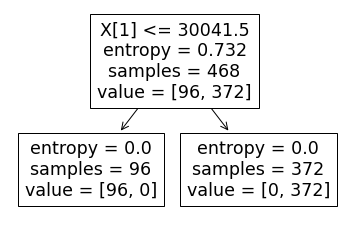

In [150]:
model_CART = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_CART.fit(x_train,y_train)
tree.plot_tree(model_CART);

Using Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9924242424242424

In [152]:
for i in range(2,100):
    for j in range(1,9):
        rf=RandomForestClassifier(n_estimators=i,max_depth=j, random_state=42)
        rf.fit(x_train,y_train)
        print(f"Accuracy of Model with {i} n_estimators and {j} max_depth is {rf.score(x_test,y_test)}")

Accuracy of Model with 2 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 2 n_estimators and 2 max_depth is 0.8712121212121212
Accuracy of Model with 2 n_estimators and 3 max_depth is 0.9848484848484849
Accuracy of Model with 2 n_estimators and 4 max_depth is 0.9621212121212122
Accuracy of Model with 2 n_estimators and 5 max_depth is 0.9393939393939394
Accuracy of Model with 2 n_estimators and 6 max_depth is 0.9621212121212122
Accuracy of Model with 2 n_estimators and 7 max_depth is 0.9621212121212122
Accuracy of Model with 2 n_estimators and 8 max_depth is 0.9772727272727273
Accuracy of Model with 3 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 3 n_estimators and 2 max_depth is 0.7954545454545454
Accuracy of Model with 3 n_estimators and 3 max_depth is 0.8712121212121212
Accuracy of Model with 3 n_estimators and 4 max_depth is 0.9393939393939394
Accuracy of Model with 3 n_estimators and 5 max_depth is 0.9393939393939394
Accuracy of 

In [154]:
rf=RandomForestClassifier(n_estimators=4,max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0